In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix

In [52]:
data = pd.read_csv("../data/heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Analysing the data.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.shape

(303, 14)

In [ ]:
data["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

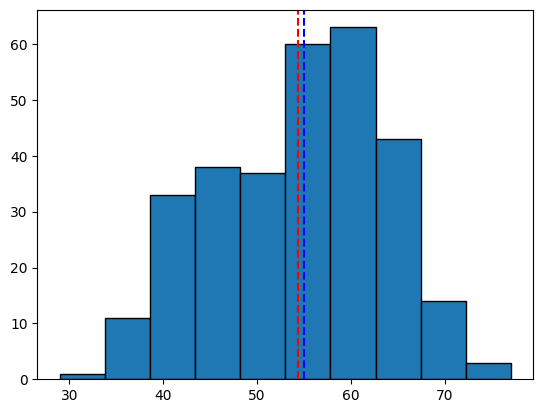

In [17]:
plt.hist(data["age"], edgecolor="black")
plt.axvline(data["age"].mean(), color="r", label="Mean", linestyle="--")
plt.axvline(data["age"].median(), color="b", label="Median", linestyle="--")

In [ ]:
data["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [ ]:
data.groupby("sex")["age"].value_counts()

sex  age
0    62     7
     58     6
     54     5
     63     5
     41     4
           ..
1    69     2
     29     1
     34     1
     37     1
     77     1
Name: count, Length: 73, dtype: int64

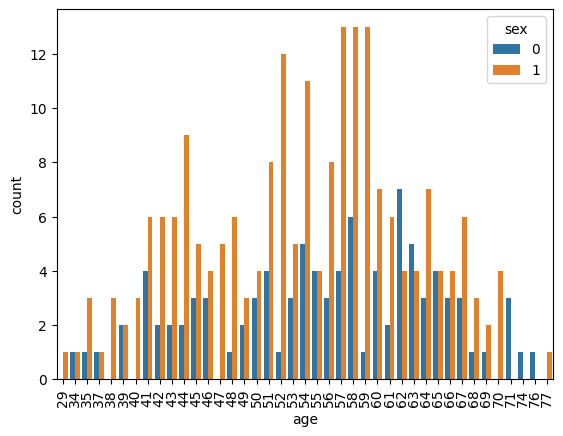

In [ ]:
sns.countplot(data=data, x="age", hue="sex")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

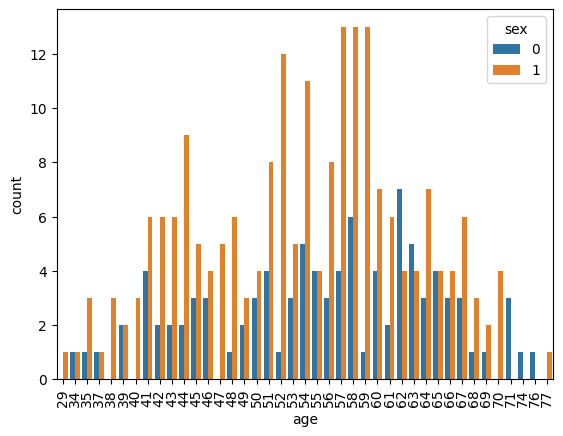

In [ ]:
sns.countplot(data=data, x="age", hue="sex")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data["trestbps"].value_counts()

trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
124     6
135     6
145     5
152     5
134     5
170     4
100     4
122     4
105     3
180     3
136     3
142     3
126     3
115     3
148     2
146     2
144     2
178     2
94      2
102     2
104     1
155     1
172     1
101     1
129     1
156     1
117     1
106     1
200     1
165     1
174     1
192     1
123     1
154     1
114     1
164     1
Name: count, dtype: int64

<Axes: xlabel='trestbps', ylabel='Count'>

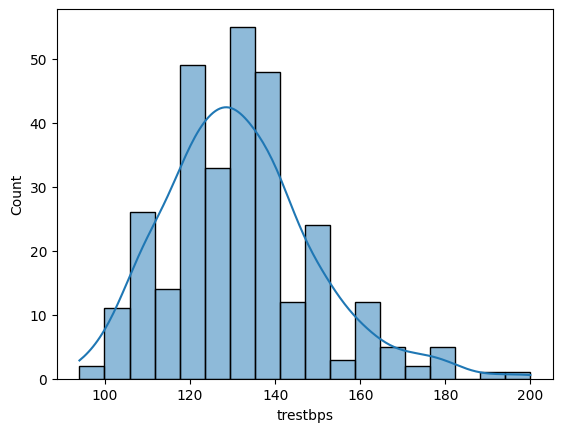

In [ ]:
sns.histplot(data["trestbps"], kde=True)

Dealing with missing values.


In [59]:
data.shape

(303, 14)

Dealing with missing values


In [62]:
data.isnull().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

There are no missing values.


Now training a classifiction model.


In [72]:
X = data.drop(["target"], axis=1)
y = data["target"]

In [ ]:
lg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lg.fit(X_train, y_train)

d:\Internship Tasks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [76]:
predictions = lg.predict(X_test)

Testing model accuracy.


In [ ]:
accuracy_score(y_test, predictions)

0.8021978021978022

Checking the ROC Curve


In [ ]:
roc_curve(y_test, predictions)

(array([0.        , 0.26829268, 1.        ]),
 array([0.  , 0.86, 1.  ]),
 array([inf,  1.,  0.]))

Evaluating the confusion matrix.


In [82]:
confusion_matrix(predictions, y_test)

array([[30,  7],
       [11, 43]])

Features affecting predictions


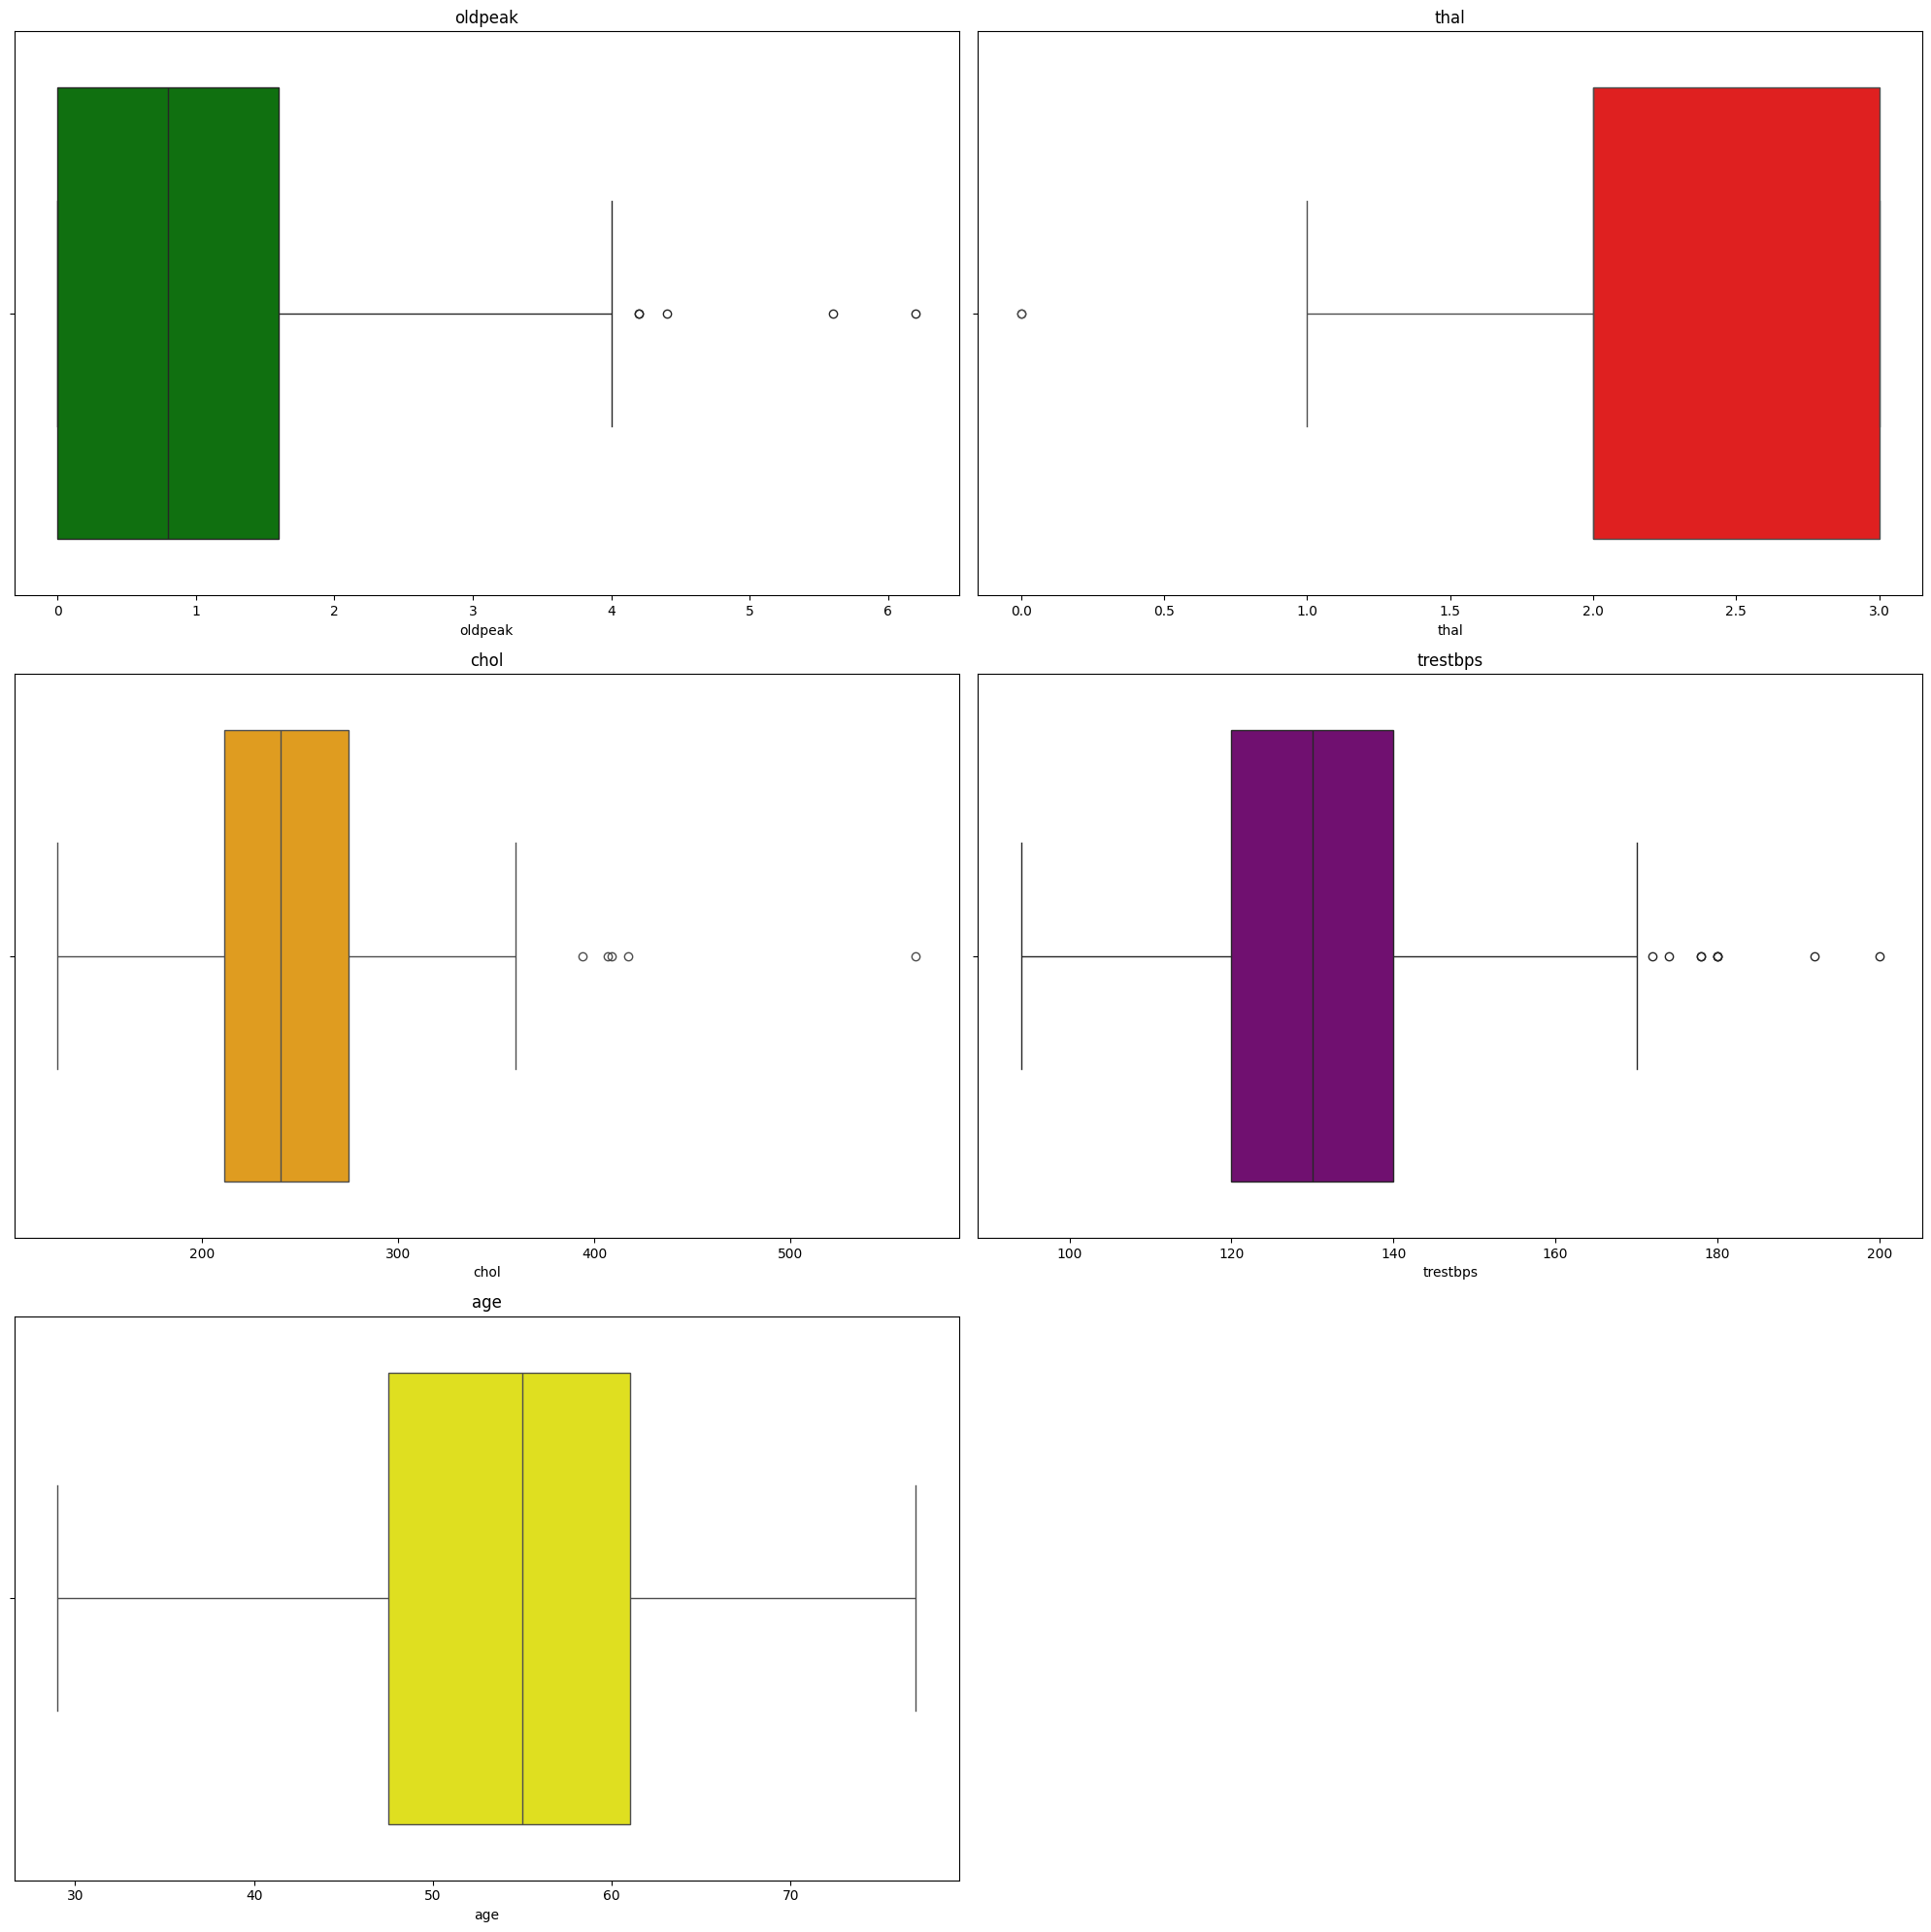

In [83]:
categorical_cols = [
    "thal",
    "ca",
    "slope",
    "exang",
    "restecg",
    "fbs",
    "cp",
    "sex",
    "num",
]
numeric_cols = ["oldpeak", "thal", "chol", "trestbps", "age"]
plt.figure(figsize=(20, 20))
colors = ["green", "red", "orange", "purple", "yellow"]
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data[col], color=colors[i % len(colors)])
    plt.title(col)
plt.tight_layout()

As seen by the boxplots trestbps, chol and oldpeak have a lot of outliers which contribute to the skeweness in precitions of the model.


Conclusion: The data is anylaysed and fed to the model which resulted in predictions with upto 80 percent accuracy.
